## Movie EDA from Scrapy JSON results


### Load in movie titles

In [4]:
import json, re
from pprint import pprint
from bs4 import BeautifulSoup

titles = []

with open('hoverlink_text2.json') as json_file:
    data = json.load(json_file)
    
    for link in data:
        #create object to hold tree, even though just a tag
        soup = BeautifulSoup(link['hoverlink_text'], 'html.parser')
        #create <a> tag object from soup object
        tag = soup.a
        #get title from <a> tag
        titles.append(tag.get('title'))
print(f'{len(titles)} titles stored in "titles" variable')
        

1077 titles stored in "titles" variable


### Pick a random group to watch from

In [5]:
from random import choice
short_list = []

for counter in range(10):
    short_list.append(choice(titles))

_ = [print(item) for item in short_list] 

The Manitou (1978)
Pollyanna (1960)
The Sadistic Baron Von Klaus (1962)
Out of the Past (1947)
Jeepers Creepers 2 (2003)
The Devil Within Her (1975)
Escape to Witch Mountain (1975)
The Red House (1947)
The Spiral Staircase (1945)
Superstition (1982)


### Visualize distribution of years among collection

In [8]:
def get_year(title):
    """extract year or starting year from parenthesis in movie title"""
    #match 4 year digits or 8 digit range if framed by parenthesis
    pattern = r'(?<=\()(\d{4}|\d{4}-\d{4})(?=\))'
    year_str = re.findall(pattern, title)
    if '-' in year_str[0]:
        year_range = year_str[0].split('-')
        return list(map(int, year_range))[0]
    else:
        return int(year_str[0])
    
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        #add 1 to value for i or to 0 if i not found
        hist[i] = hist.get(i, 0) + 1
    return hist

years_list = list(map(get_year, titles))
year_counts = count_elements(years_list)

#determine top 10 movie years
top_ten = sorted(year_counts.items(), key=lambda year_count_tuple: year_count_tuple[1], reverse=True)[:6]

for year, count in top_ten:
    print(f'There are {count} movies from {year}')

There are 40 movies from 1988
There are 37 movies from 1981
There are 31 movies from 1987
There are 26 movies from 1982
There are 25 movies from 1980
There are 24 movies from 1972


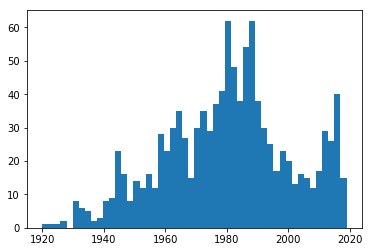

In [7]:
%matplotlib inline
from matplotlib import pyplot

years_list = list(map(get_year, titles))
_ = pyplot.hist(years_list, 50)